# <font color='red'>TME ROBOTIQUE ET APPRENTISSAGE</font>
# <font color='red'>Optimisation multi-objectif</font>

<font color="red">Version étudiant 2021-2022</font>

*mise à jour: 28/03/2022*

Ce notebook peut être exécuté dans [Google Colab](colab.research.google.com/)

Pour faciliter la lisibilité du notebook, le code donné, à écrire ou à compléter est dans les cellules en annexe, à la fin du notebook. Les cellules de réponses ne doivent contenir que les quelques instructions permettant d'afficher les résultats (éventuellement des appels permettant de les générer) et les commentaires d'analyse associés.

Vous devez déposer votre travail sur Moodle:
* déposer votre notebook, avec le nom de fichier *obligatoirement* au format suivant: **RA_NOM1_NOM2.ipynb**
* toutes les cellules exécutées
* des graphes et un commentaire sur les résultats obtenus
* affichage limité au nécessaire pour assurer la lisibilité du notebook (pas d'affichage de debug ni de centaines de graphes !)

*Le sujet est à faire en binome.*

# COMPLETEZ LES CHAMPS CI-DESSOUS AVEC NOM/PRENOM/CARTE_ETU:

* Étudiant 1: **_CANITROT_ _Julien_ _3803521_**
* Étudiant 2: **_DUBREUIL_ _Jules_ _3800417_**

## 1. Introduction

Dans ce TME, vous allez mettre en oeuvre des algorithmes évolutionnistes, notamment multi-objectifs pour faire de l'apprentissage. Pour cela, différentes fonctions vous sont fournies afin de tracer les individus générés à chaque génération ou de comparer les résultats entre eux. Vous testerez également Gym, un environnement utilisé en apprentissage par renforcement pour normaliser les expériences d'apprentissage sur des robots (virtuels).

### 1.1 Dépendances

Vous aurez besoin de la bibliothèque DEAP (https://deap.readthedocs.io/en/master/) et d'OpenAI Gym (https://gym.openai.com/).

In [1]:
%pip install deap
%pip install gym
%pip install scoop

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)
Note: you may need to restart the kernel to use updated packages.


In [7]:
# à exécuter pour pouvoir tracer les courbes demandées
import matplotlib.pyplot as plt

# pour que les figures apparaissent directement dans le notebook
%matplotlib inline 

import random
# ne pas oublier d'initialiser la graine aléatoire...
random.seed()

import numpy as np
import importlib
from deap import benchmarks

### 1.2 Scoop

DEAP est compatible avec une bibliothèque de parallisation appelée SCOOP. Elle permet d'évaluer plusieurs solutions en tirant partie des architectures multi-coeur. Cette bibliothèque ne peut malheureusement pas être utilisée dans un notebook. Pour l'utiliser, il faut appeler le programme python en chargeant le module scoop. Depuis une cellule du notebook, cela se fait comme cela:
<pre>!python3 -m scoop programme.py</pre>

Pour permettre son utilisation, les cellules de code en annexe disposent d'une commande "magique" pour à la fois les exécuter et les écrire dans un fichier. Vous pouvez donc les importer ou lancer les programmes soit depuis le notebook, soit depuis un terminal, soit encore depuis le notebook avec un appel de type:
<pre>!python3 programme.py</pre>

**Remarque:** la parallélisation que permet scoop n'est intéressante que si les évaluations sont suffisamment longues. Dans le TME, ce sera intéressant pour les expériences avec Gym, si les temps d'évaluation sont suffisamment longs. 


## 2. Prise en main de DEAP

Dans la suite du TME, vous serez invités à utiliser DEAP, cf https://deap.readthedocs.io/en/master/index.html.

Comme cela a déjà été vu, DEAP est une bibliothèque de prototypage rapide d'algorithmes évolutionnistes. Elle permet de travailler à plusieurs niveaux, depuis l'implémentation complète de l'algorithme à partir de briques de base jusqu'à l'utilisation boite noire d'un algorithme entièrement implémenté et en passant par des approches intermédiaires, dans lesquelles des modules sont réutilisés, par exemple pour la sélection, les mutations ou les croisements.  

### 2.1 Sélection par tournoi

Complétez le code en annexe pour implémenter un algorithme évolutionniste avec une sélection par tournoi qui choisira les parents sur la base de tournois à 3 individus choisis aléatoirement avec une population de taille donnée (les valeurs possibles sont indiquées ci-dessous).

Détails de l'algorithme à implémenter:
- croisement de type SBX (Simulated Binary Crossover), eta=15
- mutation de type polynomiale bornée, eta=15.0 et indpb=1/IND_SIZE (IND_SIZE étant la taille d'un génome)

Voir https://deap.readthedocs.io/en/master/api/tools.html pour les différents opérateurs défini dans DEAP et la documentation associée. Vous utiliserez les fonctions de la toolbox DEAP pour faciliter votre implémentation et vous pourrez vous inspirer des exemples fournis.

Les paramètres seront initialisés entre -5 et 5 (vous pourrez utiliser random.uniform pour l'initialisation).

**Remarque:** la méthode `register` de la toolbox permet d'enregistrer une fonction dans cette toolbox sous un nom donné en premier argument. Le deuxième argument est le nom de la fonction. Les arguments suivants sont optionnels et seront transmis automatiquement à la fonction lorsqu'elle sera appelée (en plus des arguments qui seront éventuellement ajoutés lors de l'appel, par exemple l'individu à muter dans le cas d'une méthode de mutation). Exemple:

In [3]:
from deap import tools,base

def mon_test(a, b):
    print("a="+str(a)+" b="+str(b))
toolbox = base.Toolbox() 
toolbox.register("test", mon_test, a=3)
toolbox.test(b=4)

a=3 b=4


Les algorithmes évolutionnistes ont une part stochastique et ne donnent donc pas toujours le même résultat. Vous tracerez donc l'évolution de la meilleure fitness pour 10 runs indépendants. Plutôt que de tracer les 10 courbes, vous tracerez la médiane des maxima et un intervalle représentant le 1er et le 3eme quartile. Vous procéderez pour cela de la façon suivante:


    plt.plot(gen,median_max, label="Mediane des max")
    plt.fill_between(gen, fit_25, fit_75, alpha=0.25, linewidth=0)

gen étant une liste de générations, median_max la liste des médianes des maxima et fit_25 et fit_75 les 1er et 3eme quartiles. Vous pourrez les déterminer avec la fonction quantile de numpy: quantile(points, 0.25) et quantile(points, 0.75), avec points une liste qui contient les fitness des différents runs à une génération donnée (il faut donc faire une boucle et appeler ces fonctions pour chaque génération).

Vous testerez votre algorithme sur la fonction de Ackley. Elle est disponible dans DEAP et peut être appelée dans n'importe quelle dimension. Vous pourrez faire vos tests avec la dimension IND_SIZE=10, par exemple. 

Complétez le code en annexe et tracez les courbes pour des populations de taille croissante: [5, 10, 100, 200]. Que constatez-vous ?

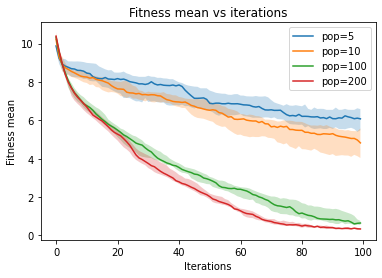

In [4]:
from ea_tournament import ea_tournament

plt.figure()
plt.title("Fitness mean vs iterations")
plt.xlabel("Iterations")
plt.ylabel("Fitness mean")

for pop_size in [5, 10, 100, 200]:
    data = []
    for _ in range(10):
        data.append(ea_tournament(pop_size, 100, evaluate=benchmarks.ackley, IND_SIZE=10)[2])

    gen = data[0].select("gen")

    genscore = [[data[j].select("avg")[i] for j in range(10)] for i in range(100)]
    median = [np.median(genscore[i]) for i in range(100)]
    fit_25 = [np.quantile(genscore[i],0.25) for i in range(100)]
    fit_75 = [np.quantile(genscore[i],0.75) for i in range(100)]
    plt.plot(gen, median, label=f"pop={pop_size}")
    plt.fill_between(gen, fit_25, fit_75, alpha=0.25, linewidth=0)

plt.legend()
plt.show()

Commentaire:
<ANSWER>

</ANSWER>


### 2.2 Sélection élitiste

Même question mais avec une séleciton de type élitiste: à chaque génération, création de pop_size nouveaux individus (par copie de la population courante, puis mutation de chaque individu avec une probabilité de MUTPB et croisement avec une probabilité de CXPB, vous pourrez utiliser l'algorithme varAnd: https://deap.readthedocs.io/en/master/api/algo.html?highlight=varand#deap.algorithms.varAnd) et sélection des pop_size meilleurs parmi les enfants ainsi générés et leurs parents (Attention: l'appel à la fonction de sélection ne se fera pas au même endroit que pour l'algorithme précédent).

Complétez le code en annexe et tracez les courbes pour des populations de taille croissante: [5, 10, 100, 200]. Que constatez-vous ?

C:\Users\jules\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scoop\fallbacks.py:38: RuntimeWarning: SCOOP was not started properly.
Be sure to start your program with the '-m scoop' parameter. You can find further information in the documentation.
Your map call has been replaced by the builtin serial Python map().
  warnings.warn(


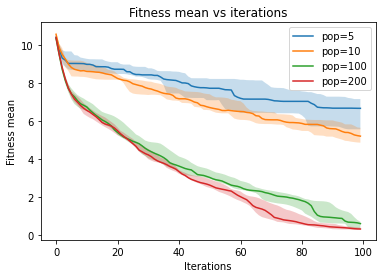

In [5]:
from ea_elitist import ea_elitist

plt.figure()
plt.title("Fitness mean vs iterations")
plt.xlabel("Iterations")
plt.ylabel("Fitness mean")

for pop_size in [5, 10, 100, 200]:
    data = []
    for _ in range(10):
        data.append(ea_elitist(pop_size, 100, evaluate=benchmarks.ackley, IND_SIZE=10)[2])

    gen = data[0].select("gen")

    genscore = [[data[j].select("avg")[i] for j in range(10)] for i in range(100)]
    median = [np.median(genscore[i]) for i in range(100)]
    fit_25 = [np.quantile(genscore[i],0.25) for i in range(100)]
    fit_75 = [np.quantile(genscore[i],0.75) for i in range(100)]
    plt.plot(gen, median, label=f"pop={pop_size}")
    plt.fill_between(gen, fit_25, fit_75, alpha=0.25, linewidth=0)

plt.legend()
plt.show()

Commentaire:
<ANSWER>

</ANSWER>

**Remarque:** les performances relatives des stratégies de sélection élitiste ou par tournoi dependent des caractéristiques de la fonction à optimiser, ne pas tirer de conclusion trop générales de vos observations.

## 3. Implémentation de NSGA-II

Implémentez maintenant NSGA-II en vous appuyant sur les fonctions fournies dans DEAP (annexe question 2 à compléter). Vous testerez NSGA-II sur un benchmark multi-objectif fourni dans DEAP, par exemple, la fonction de Fonseca et Fleming.

Utilisez l'hypervolume pour caractériser la performance et tracer les courbes avec l'hypervolume (moyenne et 1er-3eme quartiles).

Comme précédemment, tracez l'évolution de l'hypervolume (mediane des max et 1er et 3eme quartiles) pour des populations de taille [5, 10, 100, 200]. 

Que remarquez-vous ?

Dans le cas de la fonction de Fonseca, vous pourrez utiliser (1,1) comme point de référence.

In [6]:
print("Exemple d'utilisation du code de calcul de l'hypervolume. L'hypothèse est celle d'une minimisation.")
print("Il faut donner un point de référence correspondant, par exemple, aux valeurs maximales pour les objectifs.")
from deap.tools._hypervolume import hv
print("Hypervolume: %f"%(hv.hypervolume([np.array([1,0]), np.array([1,1]), np.array([0,1])], np.array([2,2]))))


Exemple d'utilisation du code de calcul de l'hypervolume. L'hypothèse est celle d'une minimisation.
Il faut donner un point de référence correspondant, par exemple, aux valeurs maximales pour les objectifs.
Hypervolume: 3.000000


In [7]:
import nsga2

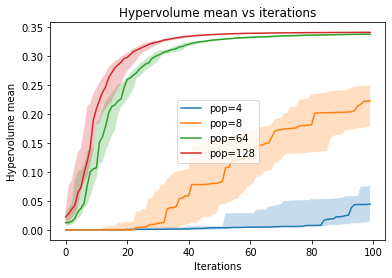

In [8]:
importlib.reload(nsga2)

plt.figure()
plt.title("Hypervolume mean vs iterations")
plt.xlabel("Iterations")
plt.ylabel("Hypervolume mean")

for pop_size in [4, 8, 64, 128]:
    data = []
    for _ in range(10):
        data.append(nsga2.nsga2(pop_size, 100, evaluate=benchmarks.fonseca)[2])

    gen = data[0].select("gen")

    genscore = [[np.mean(data[j].select("hypervolume")[i]) for j in range(10)] for i in range(100)]
    median = [np.median(genscore[i]) for i in range(100)]
    fit_25 = [np.quantile(genscore[i],0.25) for i in range(100)]
    fit_75 = [np.quantile(genscore[i],0.75) for i in range(100)]
    plt.plot(gen, median, label=f"pop={pop_size}")
    plt.fill_between(gen, fit_25, fit_75, alpha=0.25, linewidth=0)

plt.legend()
plt.show()

Commentaire:
<ANSWER>

</ANSWER>

## 4. Apprentissage de politiques avec gym

L'objectif de cette question est d'utiliser l'algorithme évolutionniste pour apprendre des politiques. Comme lors du TME précédent, vous utiliserez pour cela un problème très simple: le pendule inversé. Il s'agit de contrôler un pendule fixé sur un chariot et capable de tourner. Le chariot peut se déplacer horizontalement. Les mouvements horizontaux du pendule font osciller le pendule et l'objectif est de le maintenir à la verticale.

Les paramètres soumis à l'optimisation par algorithme évolutionniste seront les paramètres de la politique qui contrôle le pendule. Vous pourrez donc réutiliser telles quelles les implémentations que vous venez de réaliser en remplaçant simplement la fonction d'évaluation par une fonction qui calcule la fitness associée à un jeu de paramètre de politiques donné. Cette évaluation sera faite avec OpenAI-Gym. 

OpenAI-gym est un framework permettant d'implémenter des expériences d'apprentissage par renforcement. Il propose une interface simple et unifiée et inclut de nombreux environnements utilisés pour tester des algorithmes d'apprentissage par renforcement. Comme lors du TME précédent, vous utiliserez cet environnement et son module CartPole-v1 pour apprendre à contrôler le pendule (voir https://gym.openai.com/envs/CartPole-v1/). 

Les annexes contiennent:
- `nn.py`: le code associé à une politique représentée sous forme de réseaux de neurones: **NE PAS MODIFIER**
- `cartpole.py`: le squelette de code de la fonction d'évaluation s'appuyant sur Gym: **COMPLÉTER LA CELLULE**
- `cartpole_ea.py`: le squelette de code d'appel à l'algorithme évolutionniste: **COMPLÉTER LA CELLULE**


Vous tracerez dans le notebook l'évolution des fitness comme dans la question précédente. Les calculs étant plus longs, vous pouvez vous limiter à une taille de population et un seul run. Faites en fonction de vos capacités de calcul et, le cas échéant, indiquez en commentaire ce que vous vous attendriez à observer avec une puissance de calcul supérieure. 

Vous choisirez la taille de population et le nombre de d'expériences à réaliser en fonction de la puissance de calcul disponible (des tailles de 100 ou 200 sont souhaitables).

In [11]:
%%time
!python3 cartpole_ea.py

Results in elitist_cartpole_2022_04_06-17-53-04CPU times: total: 46.9 ms
Wall time: 19.6 s


C:\Users\jules\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scoop\fallbacks.py:38: RuntimeWarning: SCOOP was not started properly.
Be sure to start your program with the '-m scoop' parameter. You can find further information in the documentation.
Your map call has been replaced by the builtin serial Python map().
  warnings.warn(



Figure(640x480)


In [12]:
%%time
!python3 -m scoop cartpole_ea.py

[2022-04-06 17:53:20,122] launcher  INFO    SCOOP 0.7 1.1 on win32 using Python 3.9.12 (tags/v3.9.12:b28265d, Mar 23 2022, 23:52:46) [MSC v.1929 64 bit (AMD64)], API: 1013
[2022-04-06 17:53:20,122] launcher  INFO    Deploying 8 worker(s) over 1 host(s).
[2022-04-06 17:53:20,129] launcher  INFO    Worker distribution: 
[2022-04-06 17:53:20,129] launcher  INFO       127.0.0.1:	7 + origin
Results in elitist_cartpole_2022_04_06-17-53-28
Figure(640x480)
[2022-04-06 17:54:34,022] launcher  (127.0.0.1:56020) INFO    Root process is done.
[2022-04-06 17:54:34,023] launcher  (127.0.0.1:56020) INFO    Finished cleaning spawned subprocesses.
CPU times: total: 31.2 ms
Wall time: 1min 14s


In [11]:
#<ANSWER>

#</ANSWER>

**Remarque**: L'évaluation du pendule commence à une position aléatoire. Affichez plusieurs fois de suite la fitness obtenue en visualisant un même individu. Vous devriez observez que la fitness obtenue n'est pas toujours la même. C'est une illustration du problème de la généralisation. Pendant l'apprentissage, une politique n'a été testée que dans une condition particulière. Si vous changer un peu les conditions, vous n'avez pas de garantie sur ce qu'il va se passer... Pour limiter ce problème, une stratégie simple consiste à calculer la fitness non pas sur une seule évaluation, mais sur plusieurs et à prendre la moyenne (ou la somme) de ces différentes évaluations. Cela devrait réduire la variabilité observée. Si la puissance de calcul dont vous disposez le permet, vous pouvez modifier ainsi votre fontion d'évaluation.

## 5. Apprentissage direct dans l'espace des politiques, version multi-objectif

Le pendule inversé est en fait un problème multi-objectif dans lequel le pendule doit être maintenu à la verticale, le chariot étant centré dans une zone donnée. 

### 5.1 Cartpole & NSGA-2

Compléter la cellule de la question 5 pour minimiser l'erreur en x et en theta avec NSGA-2. Comme précédemment, vous tracerez l'évolution de l'hypervolume (prendre un point de référence à [1000, 1000]). 

Vous choisirez la taille de population et le nombre de d'expériences à réaliser en fonction de la puissance de calcul disponible (des tailles de 100 ou 200 sont souhaitables).

In [10]:
%%time
!python3 cartpole_nsga2.py

Results in nsga2_cartpole_2022_04_06-17-52-37
avg    	best                                    	gen	hypervolume	max    	min    	std   
987.432	[(865.2665214408189, 739.8405634223163)]	0  	35052.2    	992.925	739.841	17.715
CPU times: total: 15.6 ms
Wall time: 1.59 s


C:\Users\jules\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scoop\fallbacks.py:38: RuntimeWarning: SCOOP was not started properly.
Be sure to start your program with the '-m scoop' parameter. You can find further information in the documentation.
Your map call has been replaced by the builtin serial Python map().
  warnings.warn(


In [13]:
%%time
!python3 -m scoop cartpole_nsga2.py

[2022-04-06 15:25:26,884] launcher  INFO    SCOOP 0.7 1.1 on win32 using Python 3.9.12 (tags/v3.9.12:b28265d, Mar 23 2022, 23:52:46) [MSC v.1929 64 bit (AMD64)], API: 1013
[2022-04-06 15:25:26,884] launcher  INFO    Deploying 8 worker(s) over 1 host(s).
[2022-04-06 15:25:26,884] launcher  INFO    Worker distribution: 
[2022-04-06 15:25:26,884] launcher  INFO       127.0.0.1:	7 + origin
[2022-04-06 15:25:29,865] launcher  (127.0.0.1:57843) INFO    Root process is done.
[2022-04-06 15:25:29,865] launcher  (127.0.0.1:57843) INFO    Finished cleaning spawned subprocesses.
CPU times: total: 31.2 ms
Wall time: 3.78 s


Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.3312.0_x64__qbz5n2kfra8p0\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.3312.0_x64__qbz5n2kfra8p0\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\jules\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scoop\bootstrap\__main__.py", line 302, in <module>
    b.main()
  File "C:\Users\jules\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scoop\bootstrap\__main__.py", line 92, in main
    self.run()
  File "C:\Users\jules\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scoop\bootstrap\__main__.py", line 29

In [14]:
#<ANSWER>

#</ANSWER>

### 5.2 Comparaisons entre mono- et multi-objectif

Tracez sur une même figure les valeurs finales atteintes (erreur en x et erreur en theta) pour des expériences en mono-objectif et en multi-objectif. 

Pour les expériences en mono-objectif, vous tracerez un point par expérience.

Pour les expériences en multi-objectif, vous tracerez, pour chaque expérience, l'approximation du front de Pareto obtenue.



In [15]:
#<ANSWER>

#</ANSWER>
